<a href="https://colab.research.google.com/github/MarcoAlejandroSoto/phytonCasos/blob/main/Caso13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables aleatorias continuas. Distribución Uniforme

Existen distintas distribuciones que permiten tratar con variables aleatoris continuas

- **Distribución uniforme continua**
- Distribución normal
- Distribución t student
- Distribucuón exponencial
- Distribución chi cuadrada
- Distribución f de Fisher
- Entre otras....




# Distribución uniforme

La distribución uniforme continua es una familia de distribuciones de probabilidad para variables aleatorias continuas, tales que para cada miembro de la familia, todos los intervalos de igual longitud en la distribución en su rango son igualmente probables. El dominio está definido por dos parámetros, a  y b, que son sus valores mínimo y máximo respectivamente.


La distribución o modelo uniforme puede considerarse como proveniente de un proceso de extracción aleatoria .El planteamiento radica en el hecho de que la probabilidad se distribuye uniformemente a lo largo de un intervalo . Así : dada una variable aleatoria continua, x
 , definida en el intervalo [a,b]
 de la recta real, se dice que x
 tiene una distribución uniforme en el intervalo [a,b].


¿En dónde se utiliza?

Todos los valores en un intervalo tienen la misma probabilidad.
Se usa para modelar situaciones en las que todas las observaciones son igualmente probables, como en algunas simulaciones o muestreos.

### Fórmula de la densidad

$$
f(x) =
\begin{cases}
\frac{1}{b-a} &,\, \text{para }a\leq x \leq b ,\\
0&,\, \text{en cualquier otro caso }
\end{cases}
$$




# Objetivo

Generar n números aleatorios de la disribución continua y visualizar su histograma y densidad.

# Desarrollo

Existen diversas alternativas para generar números aleatorios de variables continuas en Python.

Este caso se ajsutará a utilizar la bilioteca *from scipy.stats* y la correspondiente distribución.


## Cargar librerias


In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import uniform  # uniforme continua
from scipy.stats import norm # normal

# from IPython.display import display, HTML # Para html tablas ...

## Crear funciones



In [ ]:
def f_visualizar_histograma_continua (datos, k):
  # Crear un gráfico de distribución de la variable continua
  sns.histplot(data=datos, kde=True)
  plt.xlabel(datos.columns[0])
  plt.ylabel('Frecuencia')
  plt.title('Distribución de Variable Continua')
  plt.show()

# Recibe una datos con una variable continua y el número de cortes o clases
# que sirven para construir tabla basados en los k clases
def f_construye_tabla_distribucion_continua(datos, k):
  # Crear una tabla de frecuencia
  tabla_frecuencia = pd.cut(datos.iloc[:, 0], bins=k, include_lowest=True).value_counts().reset_index()
  tabla_frecuencia.columns = ['Clase', 'Frec']
  # tabla_frecuencia

  # Ordenar la tabla de frecuencia por el intervalo
  tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
  tabla_frecuencia = tabla_frecuencia.reset_index(drop=True) # Regenera index

  # Generar columnas siguientes
  tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
  tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
  tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()

  return tabla_frecuencia

## Sembrar la semilla


In [ ]:
random.seed(2023) ## semilla año 2023

### Ejercicio Pizza

La entrega de Pizzas llega entre 15 y 45 minutos de manera uniforme. Simular 100 entregas y luego calcular la probabilida de que la entrega llegue entre 20 y 30 minutos.

In [ ]:
# Generar 100 números aleatorios en una distribución uniforme entre 15 y 45 minutos
min = 15
max = 45 - min # o sea 30 a partir de 15 que da 45 el valor máximo
n = 100

# Crear una variable aleatoria uniforme continua
uniform_rv = uniform(loc = min, scale = max)  # los define el inicio 15 y scale la amplitud

# Generar números aleatorios a partir de la distribución
numeros_aleatorios = uniform_rv.rvs(size=n)


# Imprimir los números aleatorios
np.round(numeros_aleatorios, 4)

array([28.5126, 26.3208, 37.2774, 38.2457, 36.0224, 33.7156, 43.3339,
       29.7657, 44.6162, 37.9517, 29.9505, 21.8695, 17.4088, 43.223 ,
       24.3202, 16.95  , 42.1656, 36.8816, 25.895 , 20.0291, 16.3687,
       25.1761, 15.8985, 32.3167, 35.6268, 20.4386, 29.5614, 21.6084,
       42.2082, 19.5506, 39.4935, 15.9308, 20.0283, 44.5441, 32.0131,
       23.501 , 23.895 , 42.2733, 30.7183, 39.6542, 32.4447, 42.3077,
       26.0112, 17.5898, 22.0023, 32.4713, 33.2337, 20.5017, 21.2874,
       33.4965, 34.6252, 37.1714, 41.4572, 43.0812, 15.4144, 16.8763,
       26.923 , 34.3334, 32.357 , 28.052 , 31.8397, 20.0262, 29.9371,
       20.7034, 31.8983, 23.1545, 19.1566, 25.7277, 44.9362, 30.5532,
       33.6154, 18.322 , 30.3105, 34.7384, 37.6799, 28.4004, 41.1362,
       24.3937, 15.1956, 28.8388, 17.106 , 40.7972, 20.7243, 34.6562,
       17.8586, 18.8983, 35.0298, 40.4588, 23.3568, 15.6562, 42.2127,
       43.8318, 40.5993, 15.1439, 23.6363, 28.2213, 28.1317, 22.6841,
       15.6925, 24.8

### Visualizar histograma y su densidad


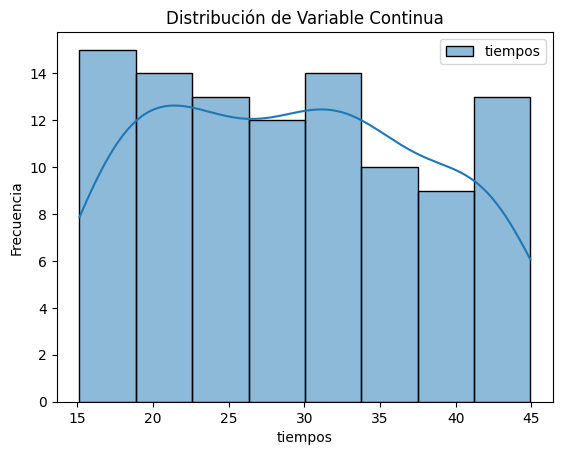

In [ ]:
# Convertir los números aleatorios a un data.frame
datos = pd.DataFrame({"tiempos" :numeros_aleatorios})
k = 7 # Numero de cortes o divisiones o clases en el histograma

# Solo mandar llamar la función

f_visualizar_histograma_continua (datos, k)

### Curva de densidad y probabilidad área bajo la curva

Se visualiza sólo la curva de densidad  por cada valor de los datos.

¿Cuál es la probabilidad de que la piza llegue entre 20 y 30 minutos?
14%



Se utiliza la función *pdf()* de la librería *scipy.stats*



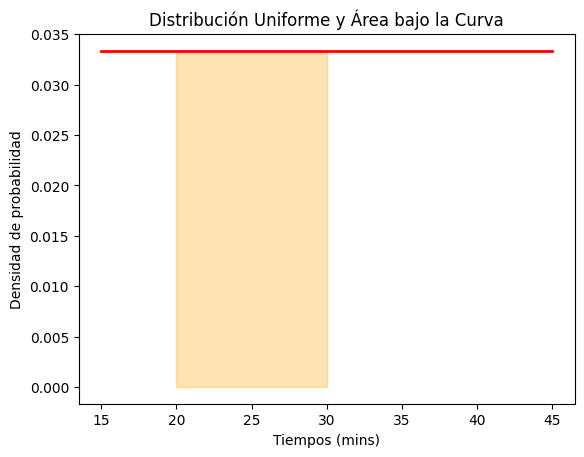

In [ ]:
# Intervalo a visualizar
intervalo_a = 20
intervalo_b = intervalo_a + 10  # Hasta 30

# Crear una secuencia de valores en el rango completo de la distribución uniforme
x = np.linspace(min, max+min)

# Calcular la densidad de probabilidad de la distribución uniforme
densidad = uniform.pdf(x, loc=min, scale=max)

# Dibujar la curva de densidad de probabilidad
plt.plot(x, densidad, 'r-', lw=2)

# Resaltar el área bajo la curva entre 20 y 30
x_fill = np.linspace(intervalo_a, intervalo_b)
y_fill = uniform.pdf(x_fill, loc=intervalo_a, scale=intervalo_b)
plt.fill_between(x_fill, y_fill, alpha=0.3, color='orange')

# Etiquetas y título del gráfico
plt.xlabel('Tiempos (mins)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Uniforme y Área bajo la Curva')

# Mostrar el gráfico
plt.show()

### La probabilidad

¿Cúal es la probabilidad de que la Pizza llegue entre 20 y 30 minutos?.


In [ ]:
# Calcular la probabilidad de que llegue entre 20 y 30 minutos
probabilidad = uniform.cdf(intervalo_b, loc=min, scale=max) - uniform.cdf(intervalo_a, loc=min, scale=max)
#probabilidad = probabilidad * 100
print(f"La probabilidad de que la pizza llegue entre 20 y 30 minutos es: {probabilidad:.2f} %")
print ("Es lo que representa el área amarilla con respecto al 100% en la imagen anterior")

La probabilidad de que la pizza llegue entre 20 y 30 minutos es: 0.33 %
Es lo que representa el área amarilla con respecto al 100% en la imagen anterior
